<a href="https://colab.research.google.com/github/Nihalhameed/ML_PROJECTS/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAR PRICE PREDICTION USING MACHINE LEARNING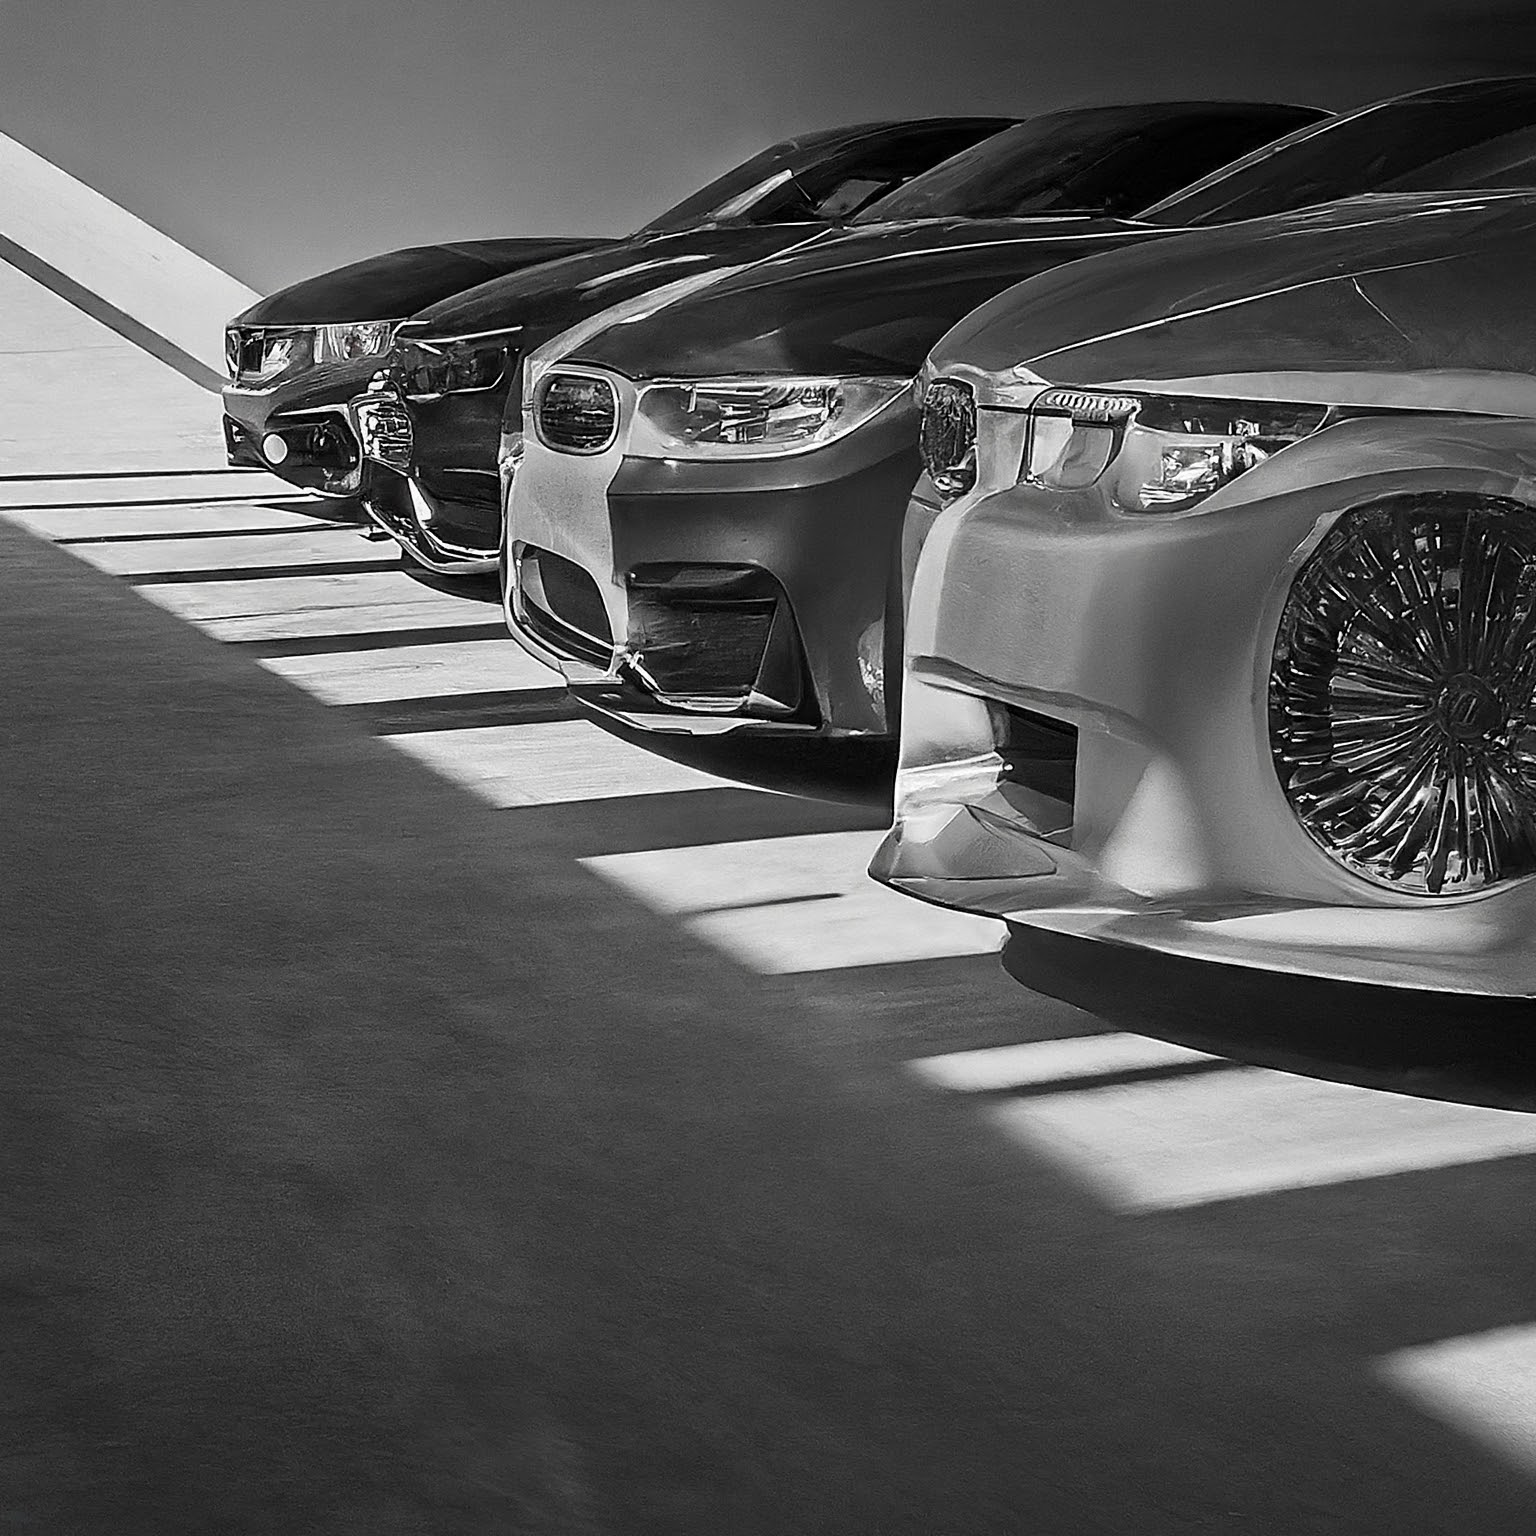**

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [418]:
#test data :
df1=pd.read_csv('/content/test-data.csv')
df1

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [419]:
#combining train data and test data:
df2=pd.concat([df,df1],axis=0)
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [420]:
df2.reset_index(drop=True,inplace=True)
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [421]:
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [422]:
df2.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [423]:
df2.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [424]:
df2.shape

(7253, 14)

In [425]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Count of object data columns :**


In [426]:
df2['Name'].value_counts()

Mahindra XUV500 W8 2WD                 55
Maruti Swift VDI                       49
Maruti Swift Dzire VDI                 42
Honda City 1.5 S MT                    39
Maruti Swift VDI BSIV                  37
                                       ..
Porsche Panamera Diesel 250hp           1
Hyundai i20 Active 1.2 SX Dual Tone     1
Maruti Swift AMT DDiS VDI               1
Maruti Wagon R VXI BS IV with ABS       1
Hyundai Elite i20 Magna Plus            1
Name: Name, Length: 2044, dtype: int64

In [427]:
mylabels,count=zip(*df2['Name'].value_counts().items())

#This code is using the zip() function to combine two lists into one.

#The first list i.e mylabels, contains the names of the locations,
#and the second list, count, contains the number of times each location appears in the dataframe.

#The zip() function combines these two lists into a single list of tuples,
#where each tuple contains the name of a location and the number of times it appears.

**Car models by Count :**

<ipython-input-428-bb3b39dcc0bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2['Name'],data=df2,palette='rainbow')


<Axes: xlabel='count', ylabel='Name'>

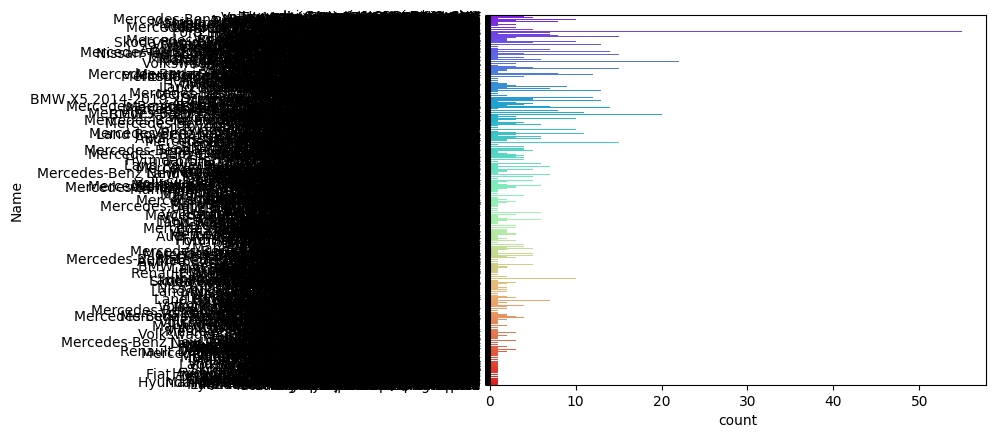

In [428]:
sns.countplot(y=df2['Name'],data=df2,palette='rainbow')

In [429]:
df2['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

**Location v/s Car Prices :**

In [430]:
mylabels1,count1=zip(*df2['Location'].value_counts().items())

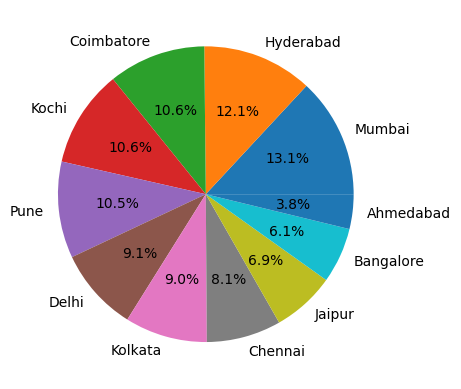

In [431]:
plt.pie(count1,labels=mylabels1,autopct='%1.1f%%')
plt.show()

**Car Price by Location :**

<ipython-input-432-34b6b4cdb25c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2['Location'],data=df2,palette='rainbow')


Text(0.5, 0, 'Price')

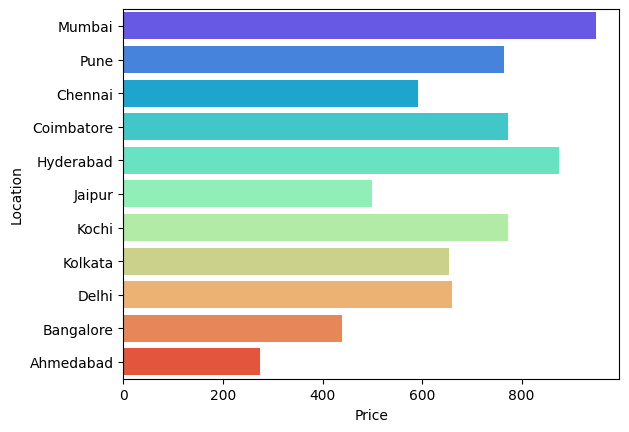

In [432]:
sns.countplot(y=df2['Location'],data=df2,palette='rainbow')
plt.xlabel('Price')

In [433]:
df2['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

**Fuel Type v/s Car Prices :**

In [434]:
mylabels2,count2=zip(*df2['Fuel_Type'].value_counts().items())

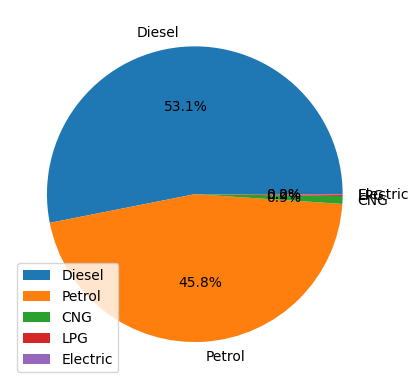

In [435]:
plt.pie(count2,labels=mylabels2,autopct='%1.1f%%')
plt.legend()
plt.show()

**Car Price by Fuel Type :**

<ipython-input-436-6d3e59b44f8c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2['Fuel_Type'],data=df2,palette='rainbow')


Text(0, 0.5, 'Price')

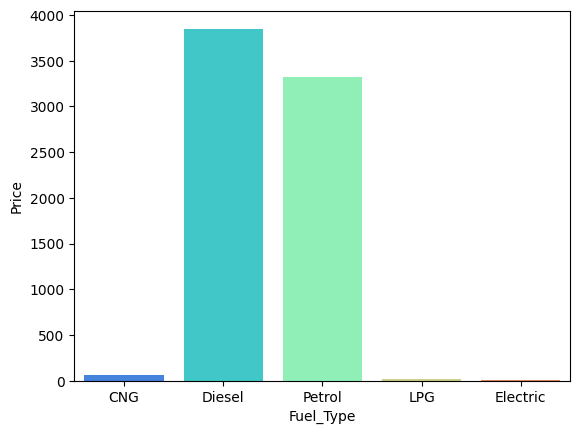

In [436]:
sns.countplot(x=df2['Fuel_Type'],data=df2,palette='rainbow')
plt.ylabel('Price')

In [437]:
df2['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

**Transmission v/s Car Prices :**

In [438]:
mylabels3,count3=zip(*df2['Transmission'].value_counts().items())

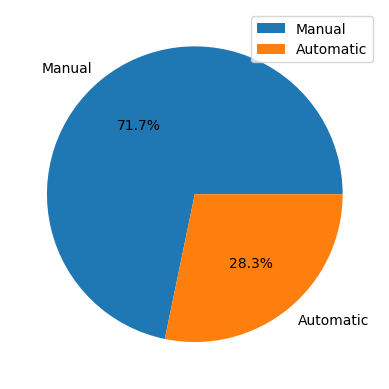

In [439]:
plt.pie(count3,labels=mylabels3,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

**Car Price by Transmission :**

<ipython-input-440-26ef83d60182>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2['Transmission'],data=df2,palette='rainbow')


Text(0, 0.5, 'Price')

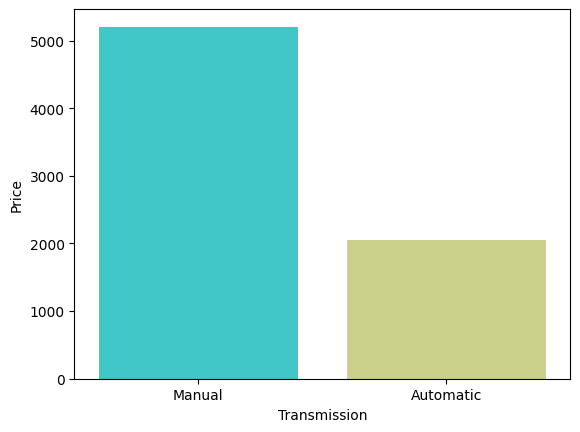

In [440]:
sns.countplot(x=df2['Transmission'],data=df2,palette='rainbow')
plt.ylabel('Price')

In [441]:
df2['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

**Owner Type v/s Car Prices :**

In [442]:
mylabels4,count4=zip(*df2['Owner_Type'].value_counts().items())

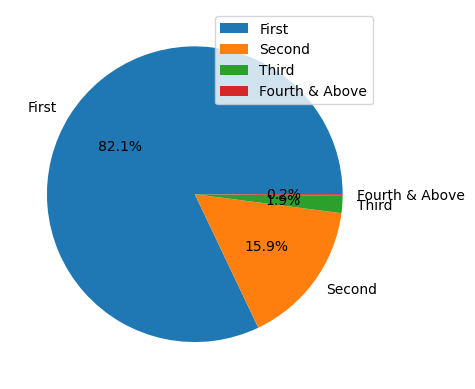

In [443]:
plt.pie(count4,labels=mylabels4,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

**Car Price by Owner Type :**

<ipython-input-444-b1ed7ca20eff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2['Owner_Type'],data=df2,palette='rainbow')


Text(0, 0.5, 'Price')

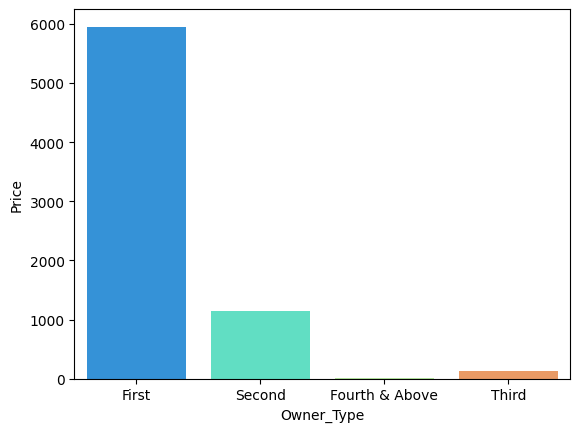

In [444]:
sns.countplot(x=df2['Owner_Type'],data=df2,palette='rainbow')
plt.ylabel('Price')

**Converting object data to numeric data :**

In [445]:
#get_dummies
df3=pd.get_dummies(df2[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
df3

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7249,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7250,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7251,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [446]:
#Now the new datframe (df1) has only division columns based on encoding.

#Old dataframe(df) has rest of the data containing other columns.

In [447]:
#Perform concatenation for joining two dataframes :

df4=pd.concat([df2,df3],axis=1)
df4

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,1,0,0,0,1,0,0,0
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,1,0,0,0,0,1,0,0,0,0
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,0,0,1,0,0,0,1,0,0,0
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,1,0,0,0,1,0,0,0,1


In [448]:
df4.dtypes

Unnamed: 0                     int64
Name                          object
Location                      object
Year                           int64
Kilometers_Driven              int64
Fuel_Type                     object
Transmission                  object
Owner_Type                    object
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
New_Price                     object
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
F

In [449]:
#Dropping unwanted columns from the dataframe :
df4.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1,inplace=True)
df4

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7249,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7250,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7251,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [450]:
#Removing strings from other object columns(datatype is not changed here) : Mileage,Engine,Power:
df4['Mileage']=df4['Mileage'].str.replace('km/kg','')
df4['Mileage']=df4['Mileage'].str.replace('kmpl','')
df4['Engine']=df4['Engine'].str.replace('CC','')
df4['Power']=df4['Power'].str.replace('bhp','')
#replacing 'null' values with 0: (mileage, engine and power columns contain null values in the dataset)
df4['Mileage']=df4['Mileage'].str.replace('null','0')
df4['Engine']=df4['Engine'].str.replace('null','0')
df4['Power']=df4['Power'].str.replace('null','0')

In [451]:
df4

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54,1598,103.6,5.0,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7249,2015,59000,17.21,1197,103.6,5.0,NaN,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7250,2012,28000,23.08,1461,63.1,5.0,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7251,2013,52262,17.2,1197,103.6,5.0,NaN,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [452]:
df4.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [453]:
#Change the datatype :

df4['Mileage']=df4['Mileage'].astype(float)
df4['Engine']=df4['Engine'].astype(float)
df4['Power']=df4['Power'].astype(float)
df4.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [454]:
#As above, Null values replaced as string 0 in 'mileage','engine' and 'power' columns :

#Then the after changing dtype to numeric, numeric 0s in those columns must be replaced with missing values (NaN)

#Then fill the missing values


In [455]:
df4.isna().sum()

Year                            0
Kilometers_Driven               0
Mileage                         2
Engine                         46
Power                          46
Seats                          53
Price                        1234
Location_Bangalore              0
Location_Chennai                0
Location_Coimbatore             0
Location_Delhi                  0
Location_Hyderabad              0
Location_Jaipur                 0
Location_Kochi                  0
Location_Kolkata                0
Location_Mumbai                 0
Location_Pune                   0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
Fuel_Type_Petrol                0
Transmission_Manual             0
Owner_Type_Fourth & Above       0
Owner_Type_Second               0
Owner_Type_Third                0
dtype: int64

In [456]:
import numpy as np
df4.loc[df4.Engine==0,'Engine']=np.NaN
df4.loc[df4.Power==0,'Power']=np.NaN
df4.loc[df4.Mileage==0,'Mileage']=np.NaN

**Handling missing values :**

In [457]:

a=df4['Mileage'].mean()
df4['Mileage'].fillna(a,inplace=True)
b=df4['Engine'].mean()
df4['Engine'].fillna(b,inplace=True)
c=df4['Power'].mean()
df4['Power'].fillna(c,inplace=True)
d=df4['Seats'].mode()[0]
df4['Seats'].fillna(d,inplace=True)
e=df4['Price'].mode()[0]
df4['Price'].fillna(d,inplace=True)

In [458]:
df4.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [459]:
df4

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54,1598.0,103.60,5.0,5.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7249,2015,59000,17.21,1197.0,103.60,5.0,5.00,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7250,2012,28000,23.08,1461.0,63.10,5.0,5.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7251,2013,52262,17.20,1197.0,103.60,5.0,5.00,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [481]:
plt.figure(figsize=(27,12))
df4.corr().style.background_gradient(cmap='Blues')

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Year,1.000000,-0.187859,0.294934,-0.054233,0.012855,0.010849,0.274921,-0.039892,-0.127910,0.216916,-0.000757,-0.080228,-0.069854,0.221862,-0.021293,-0.010645,-0.118141,0.128676,0.000687,-0.034802,-0.129658,-0.099975,-0.079629,-0.300781,-0.223790
Kilometers_Driven,-0.187859,1.000000,-0.069343,0.094765,0.030074,0.089837,-0.010999,-0.004568,0.102276,-0.047702,-0.007979,0.050666,0.043291,-0.054341,-0.056566,-0.059075,0.055572,0.111577,-0.002302,0.000928,-0.110635,0.031166,0.029443,0.070694,0.047291
Mileage,0.294934,-0.069343,1.000000,-0.638767,-0.545237,-0.345176,-0.298090,-0.066933,-0.004184,-0.021559,-0.028569,0.028536,0.057067,0.032589,0.074487,-0.086910,-0.005319,0.111921,0.000000,0.003440,-0.141835,0.354624,-0.026151,-0.119371,-0.083172
Engine,-0.054233,0.094765,-0.638767,1.000000,0.853067,0.398940,0.599580,0.083301,-0.001785,0.045559,0.049397,0.016843,-0.080334,-0.018729,-0.077630,0.029980,-0.041464,0.429411,-0.019077,-0.037557,-0.410954,-0.492782,0.001765,0.040772,0.026503
Power,0.012855,0.030074,-0.545237,0.853067,1.000000,0.094830,0.698043,0.093108,-0.032799,0.070215,0.044608,-0.017771,-0.098776,0.013898,-0.069823,0.055993,-0.060214,0.285685,-0.017527,-0.038703,-0.266903,-0.636225,-0.013335,0.025630,0.012429
Seats,0.010849,0.089837,-0.345176,0.398940,0.094830,1.000000,0.046913,0.018435,0.017999,0.007534,0.032433,0.020268,-0.016538,-0.027834,-0.042604,-0.000766,-0.003009,0.305790,-0.005701,-0.013973,-0.298698,0.078724,0.036348,-0.001345,0.011215
Price,0.274921,-0.010999,-0.298090,0.599580,0.698043,0.046913,1.000000,0.075265,-0.040822,0.153217,0.007177,0.011789,-0.080198,0.049898,-0.096812,-0.001132,-0.076920,0.289145,0.006685,-0.022904,-0.279543,-0.531143,-0.019735,-0.064480,-0.049856
Location_Bangalore,-0.039892,-0.004568,-0.066933,0.083301,0.093108,0.018435,0.075265,1.000000,-0.075692,-0.087709,-0.080406,-0.094189,-0.069076,-0.087709,-0.080003,-0.098601,-0.087263,0.045508,-0.004221,-0.010345,-0.041393,-0.070171,0.032288,0.102890,0.019894
Location_Chennai,-0.127910,0.102276,-0.004184,-0.001785,-0.032799,0.017999,-0.040822,-0.075692,1.000000,-0.102797,-0.094237,-0.110391,-0.080958,-0.102797,-0.093765,-0.115562,-0.102274,0.027394,0.025407,-0.012125,-0.024207,0.034656,0.025076,0.078771,0.110457
Location_Coimbatore,0.216916,-0.047702,-0.021559,0.045559,0.070215,0.007534,0.153217,-0.087709,-0.102797,1.000000,-0.109199,-0.127918,-0.093812,-0.119117,-0.108652,-0.133910,-0.118512,0.017916,-0.005732,-0.014050,-0.010685,-0.084313,-0.003050,-0.063133,-0.038036


<Figure size 2700x1200 with 0 Axes>

<Axes: >

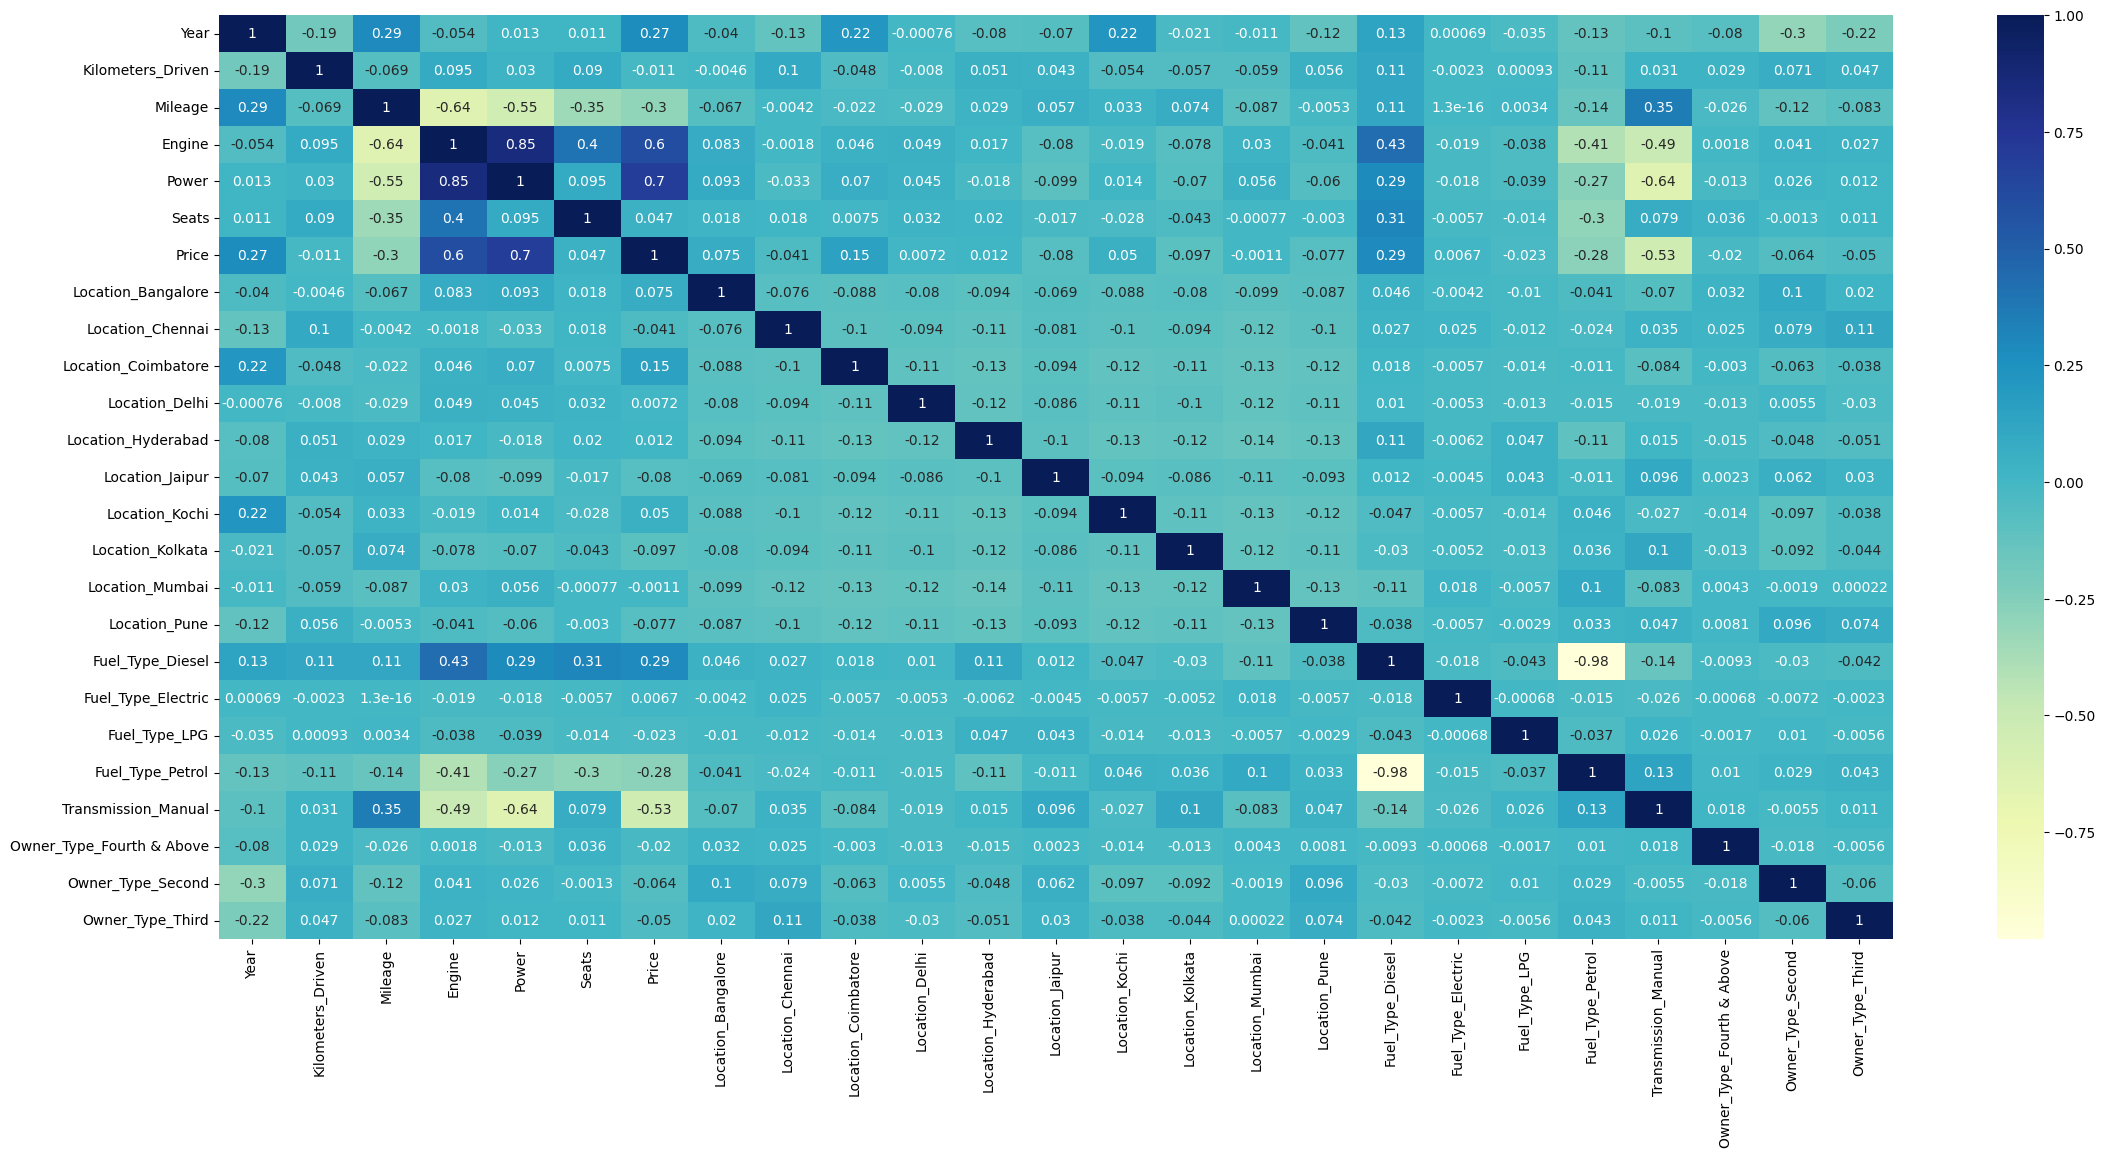

In [476]:
plt.figure(figsize=(27,12))
sns.heatmap(df4.corr(),annot=True,cmap='YlGnBu')

In [484]:
x=df4.drop(['Price'],axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011,89411,20.54,1598.0,103.60,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7249,2015,59000,17.21,1197.0,103.60,5.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7250,2012,28000,23.08,1461.0,63.10,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7251,2013,52262,17.20,1197.0,103.60,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [485]:
y=df4['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
7248     5.00
7249     5.00
7250     5.00
7251     5.00
7252     5.00
Name: Price, Length: 7253, dtype: float64

In [486]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [487]:
#Model creation :
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 4.9113138 ,  4.98889967, -0.42749986, ...,  7.03860681,
        2.49437675, 16.93969855])

**Model Prediction :**

In [495]:
print(model.predict([[2022,46000,26.5,1500,155.5,6,0,0,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1]]))


[19.42592693]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
